In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Looking at the features


In [0]:
data = pd.read_csv('http://www.dsi.uminho.pt/~pcortez/forestfires/forestfires.csv')
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## 2. Local Concentration

In [0]:
from statistics import mean

a1 = data['temp'].mean() # pandas function
a2 = mean(data['temp'])  # statistics function
a3 = np.mean(data['temp']) # numpy mean

print(f'{a1}, {a2}, {a3}')

18.88916827852998, 18.88916827852998, 18.88916827852998


In [0]:
from statistics import mode
from scipy import stats

a1 = data['temp'].mode() # pandas function
#a2 = mode(data['temp'])  # statistics function
a3 = stats.mode(data['temp']) # stats function

print(f'{a1}, {a3}')

0    17.4
1    19.6
dtype: float64, ModeResult(mode=array([17.4]), count=array([8]))


In [0]:
from statistics import median

a1 = data['temp'].median() # pandas function
a2 = median(data['temp'])  # statistics function
a3 = np.median(data['temp']) # numpy function

print(f'{a1}, {a2}, {a3}')

19.3, 19.3, 19.3


## 3. Dispersion

In [0]:
from statistics import stdev

a1 = data['temp'].std() # pandas function
a2 = stdev(data['temp'])  # statistics function
a3 = np.std(data['temp']) # numpy function

print(f'{a1}, {a2}, {a3}')

5.806625349573503, 5.806625349573505, 5.8010069395983646


In [0]:
from statistics import variance

a1 = data['temp'].var() # pandas function
a2 = variance(data['temp'])  # statistics function
a3 = np.var(data['temp']) # numpy function

print(f'{a1}, {a2}, {a3}')

33.7168979503096, 33.71689795030963, 33.65168151326838


## 4. Shape

In [0]:
from scipy.stats import skew

a1 = data['temp'].skew() # pandas function
a2 = skew(data['temp'])  # scipy stats

print(a1, a2)

-0.331172237347285 -0.3302106140354586


In [0]:
from scipy.stats import kurtosis

a1 = data['temp'].kurt() # pandas function
a2 = kurtosis(data['temp'])  # scipy stats

print(a1, a2)

0.1361655076587991 0.12326917606611909


## 5. Describe Method

In [0]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


## 6. Visualization

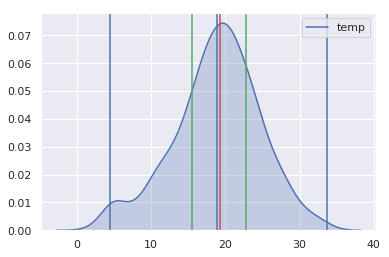

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

sns.kdeplot(data['temp'], shade=True)

plt.axvline(data['temp'].mean(), 0, 1)
plt.axvline(data['temp'].median(), 0, 1, color='r')
plt.axvline(result['temp']['25%'], 0, 1, color='g')
plt.axvline(result['temp']['75%'], 0, 1, color='g')

IQR = result['temp']['75%'] - result['temp']['25%']

upper_outliers = result['temp']['75%'] + 1.5*IQR
lower_outliers = result['temp']['25%'] - 1.5*IQR

plt.axvline(upper_outliers, 0, 1, color='b')
plt.axvline(lower_outliers, 0, 1, color='b')



In [0]:
result = data.describe()
result['temp']

count    517.000000
mean      18.889168
std        5.806625
min        2.200000
25%       15.500000
50%       19.300000
75%       22.800000
max       33.300000
Name: temp, dtype: float64

In [0]:
result['temp']['50%']

19.3